In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Building VGG 16 CNN Model

In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
print('sucess')

2024-03-01 21:09:11.483320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 21:09:11.483450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 21:09:11.609814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


sucess


In [4]:
#splitting data into train and test

In [5]:
# Path to the directory containing the images
image_directory = "/kaggle/input/scientific-biomedical-image-dataset/Scientific Biomedical Image Dataset/class_wise images"

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 100

In [6]:
# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # This is the training set
)

# Create a generator for testing data (which is part of the training data)
test_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # This is the test set (portion of training data)
)

Found 15245 images belonging to 7 classes.
Found 3808 images belonging to 7 classes.


In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))


In [8]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [10]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

hist = model.fit(train_generator, validation_data= test_generator,epochs = 20, callbacks=[early_stop])

Epoch 1/20


I0000 00:00:1709327390.202750     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


153/153 [==============================] - 175s 914ms/step - loss: 148.8945 - accuracy: 0.5114 - val_loss: 183.1616 - val_accuracy: 0.7203
Epoch 2/20
153/153 [==============================] - 116s 755ms/step - loss: 0.7845 - accuracy: 0.7043 - val_loss: 313.7704 - val_accuracy: 0.7361
Epoch 3/20
153/153 [==============================] - 116s 756ms/step - loss: 0.6050 - accuracy: 0.7743 - val_loss: 204.8310 - val_accuracy: 0.7734
Epoch 4/20
153/153 [==============================] - 116s 756ms/step - loss: 0.6475 - accuracy: 0.7620 - val_loss: 106.4728 - val_accuracy: 0.8009
Epoch 5/20
153/153 [==============================] - 116s 756ms/step - loss: 0.4983 - accuracy: 0.8184 - val_loss: 559.7253 - val_accuracy: 0.8199
Epoch 6/20
153/153 [==============================] - 116s 756ms/step - loss: 0.4096 - accuracy: 0.8488 - val_loss: 430.2354 - val_accuracy: 0.8280
Epoch 7/20
153/153 [==============================] - 115s 752ms/step - loss: 0.3864 - accuracy: 0.8609 - val_loss: 622.1

In [14]:
import pickle
filename = 'vgg_model#1.sav'
pickle.dump(model, open(filename, 'wb'))

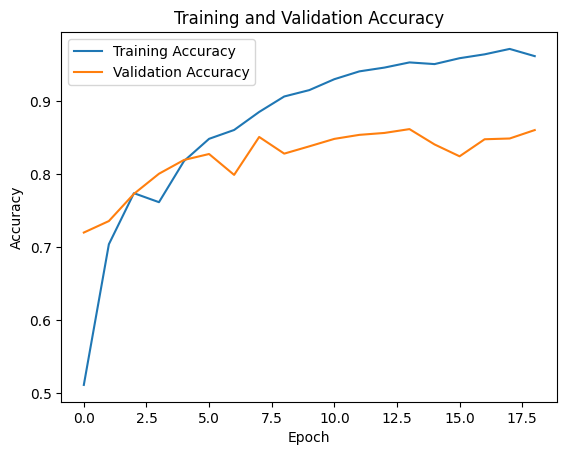

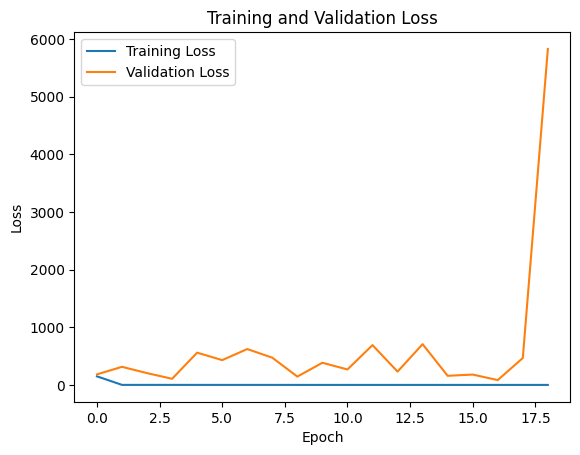

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predictions

1/1 [==============================] - 1s 677ms/step
[[0. 0. 0. 1. 0. 0. 0.]]


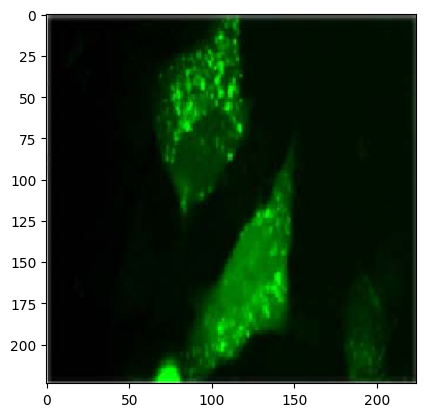

In [12]:
from keras.preprocessing import image
img = image.load_img("/kaggle/input/biomedical-small-data-subset/small data subset/microscopy/10075.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
print(output)